In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

## Cчитывание данных

In [2]:
df1=pd.read_csv('January.csv', delimiter=',')
df2=pd.read_csv('Feb.csv', delimiter=',')
df3=pd.read_csv('Mart.csv', delimiter=',')
df4=pd.read_csv('Apr.csv', delimiter=',')
df5=pd.read_csv('Mai.csv', delimiter=',')
df6=pd.read_csv('Juni.csv', delimiter=',')
df7=pd.read_csv('Jule.csv', delimiter=',')
df8=pd.read_csv('avg.csv', delimiter=',')
df9=pd.read_csv('sep.csv', delimiter=',')
df10=pd.read_csv('oct.csv', delimiter=',')
df11=pd.read_csv('nov.csv', delimiter=',')
df12=pd.read_csv('dec.csv', delimiter=',')

Объединение данных по месяцам

In [3]:
df0 = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12], ignore_index=True)

Очистка данных от отмененных и перенаправленных рейсов

In [6]:
df0.drop(df0[df0['CANCELLED'] ==1].index, inplace=True)
df0.drop(df0[df0['DIVERTED'] ==1].index, inplace=True)

Выборка рейсов только из штата Калифорнии

In [9]:
df0.drop(df0[df0['ORIGIN_STATE_NM'] !='California'].index, inplace=True)

Удаление данных, которые предположительно не несут важной информации или не известны до окончания полета

In [10]:
df0=df0.drop(df0.columns[[5, 9, 10, 12]], axis='columns')

Перевод в минуты запланированного времени отправления

In [11]:
n=df0['CRS_DEP_TIME']//100
k=df0['CRS_DEP_TIME']%100 
df0['CRS_DEP_TIME']=n*60+k

Перемешивание строк

In [12]:
df0=df0.sample(frac=1)

In [13]:
df0

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,DISTANCE
875713,8,10,5,WN,OAK,EWR,550,-1.0,2555.0
448943,5,11,5,AS,LAX,SEA,360,-5.0,954.0
342885,4,1,7,OO,LAX,SFO,1260,-6.0,337.0
1081494,10,1,1,AS,LAX,SEA,725,84.0,954.0
840721,8,14,2,OO,SNA,SFO,520,99.0,372.0
...,...,...,...,...,...,...,...,...,...
383725,4,4,3,AA,ONT,DFW,647,6.0,1188.0
1190707,11,12,1,AS,SFO,LAS,670,0.0,414.0
792337,8,4,6,WN,SAN,ABQ,1170,-1.0,628.0
857626,8,6,1,WN,LAX,SJC,1255,62.0,308.0


## Анализ признаков

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns

Матрица корреляции численных признаков

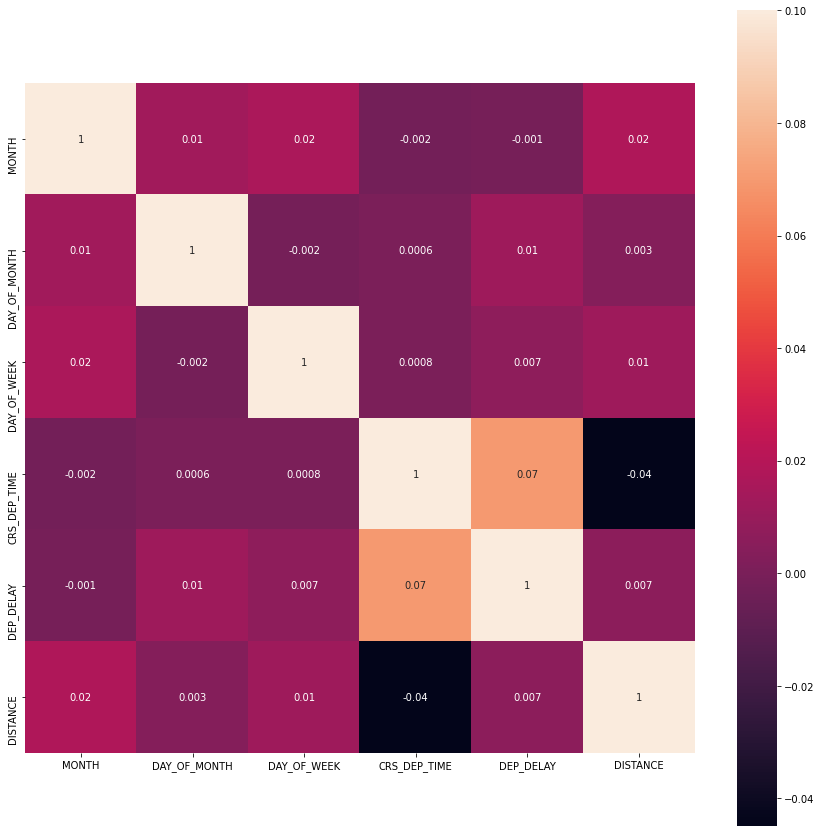

In [15]:
df = df0.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df, annot = True, fmt='.1g', vmax=0.1,  square=True)
plt.show()

Анализ зависимости задержек от различных признаков

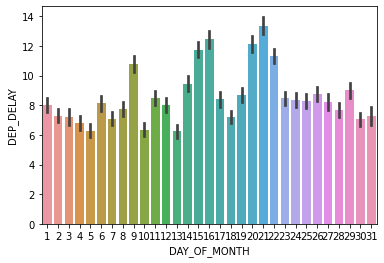

In [17]:
fig = plt.figure(1)
sns.barplot(x='DAY_OF_MONTH', y='DEP_DELAY', data=df0)
plt.show()

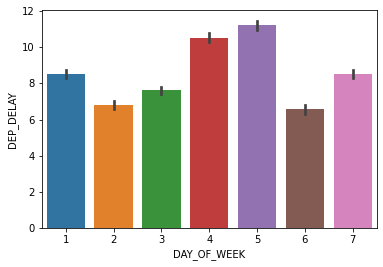

In [18]:
fig = plt.figure(1)
sns.barplot(x='DAY_OF_WEEK', y='DEP_DELAY', data=df0)
plt.show()

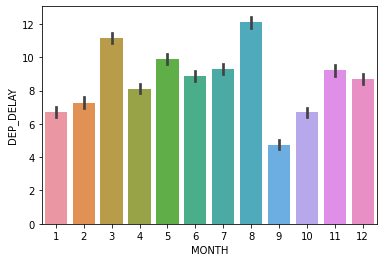

In [19]:
fig = plt.figure(1)
sns.barplot(x='MONTH', y='DEP_DELAY', data=df0)
plt.show()

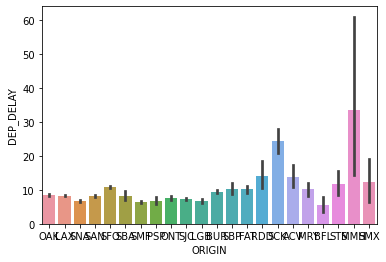

In [20]:
fig = plt.figure(1)
sns.barplot(x='ORIGIN', y='DEP_DELAY', data=df0)
plt.show()

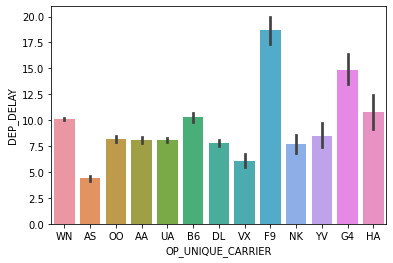

In [21]:
fig = plt.figure(1)
sns.barplot(x='OP_UNIQUE_CARRIER', y='DEP_DELAY', data=df0)
plt.show()

Список признаков до учета полученных данных

In [22]:
list(df0)

['MONTH',
 'DAY_OF_MONTH',
 'DAY_OF_WEEK',
 'OP_UNIQUE_CARRIER',
 'ORIGIN',
 'DEST',
 'CRS_DEP_TIME',
 'DEP_DELAY',
 'DISTANCE']

## Подготовка данных с учетом анализа признаков

Удаление незначительных признаков (месяца, дня недели, места прибытия и расстояние)

In [25]:
df0=df0.drop(df0.columns[[0, 2, 5, 8]], axis='columns')

Список признаков после учета полученных данных

In [27]:
list(df0)

['DAY_OF_MONTH', 'OP_UNIQUE_CARRIER', 'ORIGIN', 'CRS_DEP_TIME', 'DEP_DELAY']

Кодирование категориальных и периодических признаков one hot encoding

In [28]:
one_hot = pd.get_dummies(df0['DAY_OF_MONTH'])
df0 = df0.drop('DAY_OF_MONTH',axis = 1)
df0 = df0.join(one_hot)
one_hot = pd.get_dummies(df0['OP_UNIQUE_CARRIER'])
df0 = df0.drop('OP_UNIQUE_CARRIER',axis = 1)
df0 = df0.join(one_hot)
one_hot = pd.get_dummies(df0['ORIGIN'])
df0 = df0.drop('ORIGIN',axis = 1)
df0 = df0.join(one_hot)

Нормализация данных

In [29]:
X = df0.drop(columns=["DEP_DELAY"])
Y = df0["DEP_DELAY"]
X = X / X.aggregate("max")
df0["CRS_DEP_TIME"]=X["CRS_DEP_TIME"]

In [30]:
df0

,CRS_DEP_TIME,DEP_DELAY,1,2,3,4,5,6,7,8,...,SAN,SBA,SBP,SCK,SFO,SJC,SMF,SMX,SNA,STS
875713,0.382210,-1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
448943,0.250174,-5.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
342885,0.875608,-6.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1081494,0.503822,84.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
840721,0.361362,99.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383725,0.449618,6.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1190707,0.465601,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
792337,0.813065,-1.0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
857626,0.872133,62.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Сохранение полученных данных

Создание тренировочной и тестовой выборок с помощью библиотеки

In [32]:
train, test = train_test_split(df0, test_size=0.2)

In [294]:
df0.to_csv('full_data.csv')

In [295]:
train.to_csv('train.csv')

In [296]:
test.to_csv('test.csv')